# Automatic feature selection with LASSO regression

In this notebook we will learn how LASSO (Least Absolute Shrinkage and Selection Operator) regression works and how it can assist in automatically selecting which variables should be included using a **Cross-Validation** perspective.

#### Start by importing packages

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


## Class discussion

How does the r-squared of this model compare to the one we did at the start of the lecture?

Given the above, how is the LASSO approach better than a vanilla OLS?

Look at the adjusted R-squared. How does that compare across models. In what ways is the adjusted R-squared similar the CV approach?




In [2]:

# Today we will work with a dataset on breast cancer, also built into the scikit-learn datasets.
cancer = load_breast_cancer()

# print('Dataset raw object', cancer)
print('Dataset description', cancer['DESCR'])


Dataset description .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, 

In [3]:

# Split into our training and testing XY sets.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)


In [4]:

# However, the MLP method doesn't automatically scale the data, so let's do that.
# Here I show how to do it manually with Numpy functions, though there are alternative
# built-in methods within scikit-learn.


In [5]:

# Using numpy functions, compute the mean value per feature on the training set and the STD.
# May want to remind ourselves what the X_train looks like.
print('X_train', X_train)


X_train [[1.185e+01 1.746e+01 7.554e+01 ... 9.140e-02 3.101e-01 7.007e-02]
 [1.122e+01 1.986e+01 7.194e+01 ... 2.022e-02 3.292e-01 6.522e-02]
 [2.013e+01 2.825e+01 1.312e+02 ... 1.628e-01 2.572e-01 6.637e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]


In [6]:

# The power of Numpy starts to be evident here.
# We can calculate the mean of each column (we specify we want sums each column, which means
# summing down the first axis). The .mean() function from Numpy as insanely efficient
# for processing very big data and is ready for, e.g., super computers.


In [7]:
mean_on_train = X_train.mean(axis=0)

print('mean_on_train', mean_on_train)


mean_on_train [1.41591714e+01 1.92330047e+01 9.21438967e+01 6.58415023e+02
 9.63659859e-02 1.03669601e-01 8.86501308e-02 4.91440610e-02
 1.80473239e-01 6.26169953e-02 4.04795070e-01 1.21222723e+00
 2.84097934e+00 4.06956737e+01 6.98667371e-03 2.50779930e-02
 3.16993207e-02 1.17015352e-02 2.04367559e-02 3.71274953e-03
 1.63168169e+01 2.56379812e+01 1.07459131e+02 8.87647887e+02
 1.32503404e-01 2.52836338e-01 2.69481120e-01 1.15279345e-01
 2.89649296e-01 8.35402582e-02]


In [8]:

# the .std() function is similarily powerful/fast.
std_on_train = X_train.std(axis=0)

print('std_on_train', std_on_train)



std_on_train [3.54820940e+00 4.11777749e+00 2.44085763e+01 3.60001771e+02
 1.38386118e-02 5.06235856e-02 7.84252380e-02 3.87729435e-02
 2.76599707e-02 6.84425158e-03 2.86830175e-01 5.45592960e-01
 2.05927160e+00 4.84585335e+01 2.82332840e-03 1.69519540e-02
 3.14116890e-02 5.90579400e-03 8.19292513e-03 2.62721557e-03
 4.88905984e+00 6.05754894e+00 3.39251771e+01 5.85664376e+02
 2.29034367e-02 1.51720808e-01 1.98125175e-01 6.55415896e-02
 6.32173051e-02 1.77743394e-02]


In [9]:

# Still using the Numpy awesomeness,
# subtract the mean, and scale by inverse standard deviation,
# making it  mean=0 and std=1


In [10]:

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train


In [11]:

# Using this new scaled training data, we are ready to define a Neural Net,
# Known here as a Multi-Layer-Perceptron (MLP) classifier.
# Because this next line hides away millions of other lines of code, you may want
# to explore it. In Pycharm, you can navigate to a function's definition by placing
# your cursor in the function and press f-12. Try it! The  best documentation
# is often the code itself.


In [12]:
mlp = MLPClassifier(random_state=0)

# Now fit it with the scaled X and y TRAINING data.
mlp.fit(X_train_scaled, y_train)


c:\Users\jajohns\AppData\Local\mambaforge\envs\8222env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [13]:

# Assess its accuracy on the TRAINING and the TESTING data.
# Notice here also I'm introducing another convenient way of combining strings
# and numbers. The {:.2f} specifies a placeholder for a 2-digit representation
# of a floating point number. The Format method then places that floating point value
# into that placeholder.


In [14]:
score_train = mlp.score(X_train_scaled, y_train)
score_test = mlp.score(X_test_scaled, y_test)

print("Accuracy on training set: {:.3f}".format(score_train))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.965


In [15]:

# Other concepts discussed earlier, such as regularization and Cross-Validation, also apply here.
# To illustrate, here we will set the alpha parameter to include a regulariazation term.
# The cross-validation method is often defined by the model itself and will be used automatically
# when you call .fit().


In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.972


In [17]:

# But what does a MLP Neural Net actually LOOK like?
# Plot the coeffs_ array to find out:


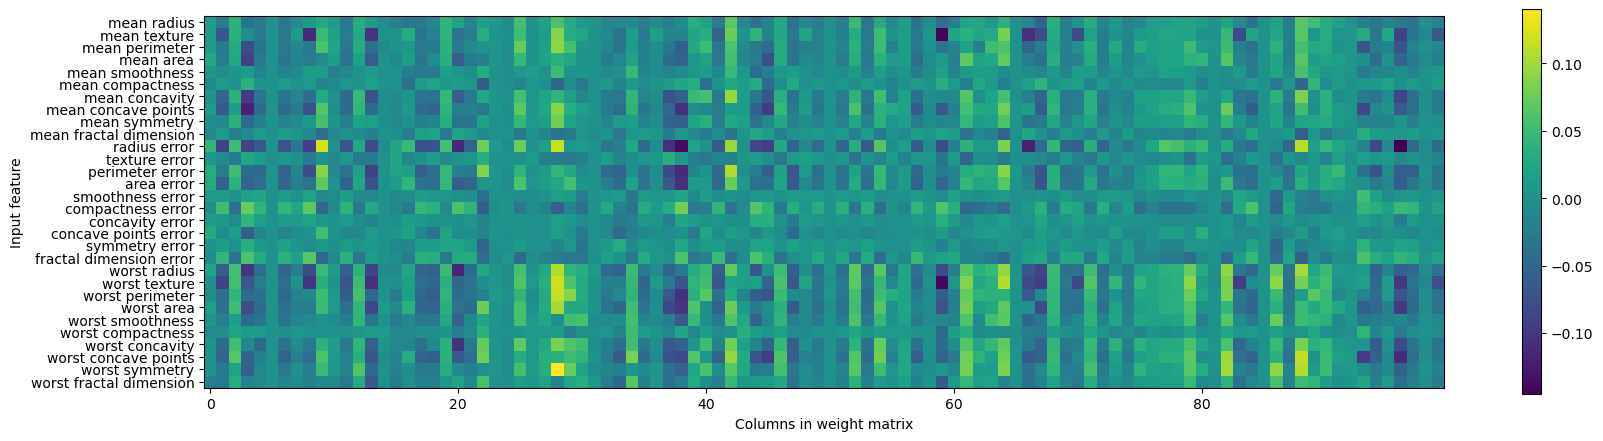

In [18]:

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()